In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,76,1
1,117,64
2,10,64
3,118,56
4,2,34
...,...,...
1915,85,56
1916,58,50
1917,47,39
1918,48,63


<Axes: >

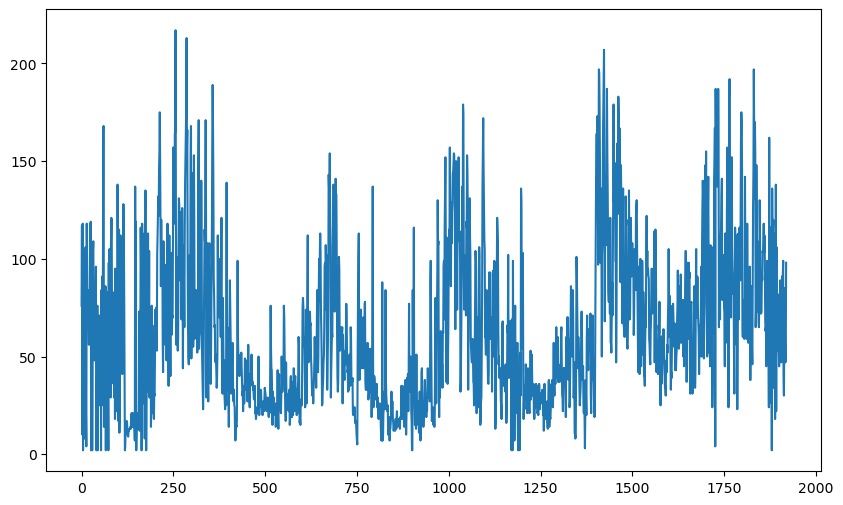

In [5]:
data['pm25'].plot(figsize=(10,6))

In [6]:
# Split the data into training, testing
train_size = int(0.7 * len(data))
test_size = int(0.3 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1344
Test data size: 576


In [7]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit()

In [8]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'o3'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))

In [9]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index = data.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)

# Dự đoán cho 30 ngày tiếp theo
y_next_30_days = model_fitted.forecast(model_fitted.endog[-model_fitted.k_ar:], steps=90)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_30_days)


Predicted closing prices for the next 90 days:
[[ 8.71189757 14.00556191]
 [18.18663687 18.94755837]
 [26.92906367 22.39337196]
 [33.73004724 24.94204865]
 [38.87086673 26.85005094]
 [42.73573366 28.28180915]
 [45.63829816 29.3566888 ]
 [47.81771923 30.16371688]
 [49.45409616 30.76965036]
 [50.68272935 31.22459935]
 [51.60521687 31.56618588]
 [52.29784262 31.82265722]
 [52.81788261 32.01522203]
 [53.20834107 32.15980429]
 [53.50150663 32.26836012]
 [53.72162234 32.34986643]
 [53.88689049 32.41106331]
 [54.01097776 32.4570114 ]
 [54.10414546 32.49151032]
 [54.17409799 32.51741294]
 [54.22662003 32.53686124]
 [54.26605483 32.5514635 ]
 [54.29566342 32.56242722]
 [54.31789426 32.57065904]
 [54.33458571 32.57683969]
 [54.34711804 32.58148027]
 [54.35652762 32.58496453]
 [54.36359256 32.58758059]
 [54.36889708 32.5895448 ]
 [54.37287985 32.59101957]
 [54.3758702  32.59212686]
 [54.37811543 32.59295824]
 [54.3798012  32.59358246]
 [54.38106692 32.59405115]
 [54.38201725 32.59440304]
 [54.382

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 48.36402504025484

Testing MAE: 35.94751528054649

Testing MAPE: 49.100195992507196


In [11]:
test_data.index

RangeIndex(start=1344, stop=1920, step=1)

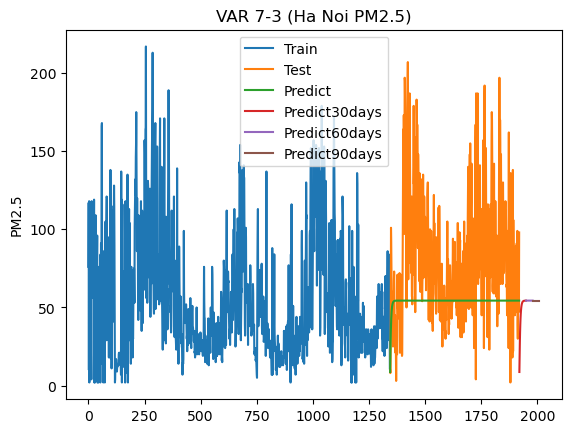

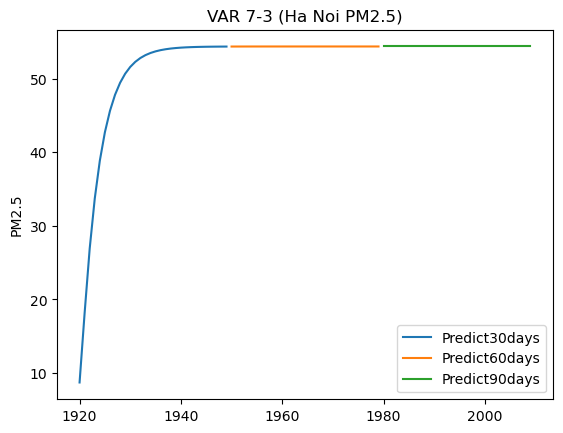

In [12]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['pm25'])
plt.plot(test_data.index, test_data['pm25'])
plt.plot(test_data.index, y_pred[:, 0])


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30][:, 0])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60][:, 0])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90][:, 0])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('VAR 7-3 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30][:, 0])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60][:, 0])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90][:, 0])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('VAR 7-3 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

